In [1]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

Welcome to JupyROOT 6.18/04


# Intro

The purpose of this notebook is just to visualize these templates, and get a feel for working with some tools again after the break

### Start by just visualizing the splines

In [2]:
f = r.TFile("./calotemplate15.root")

#### Just one spline

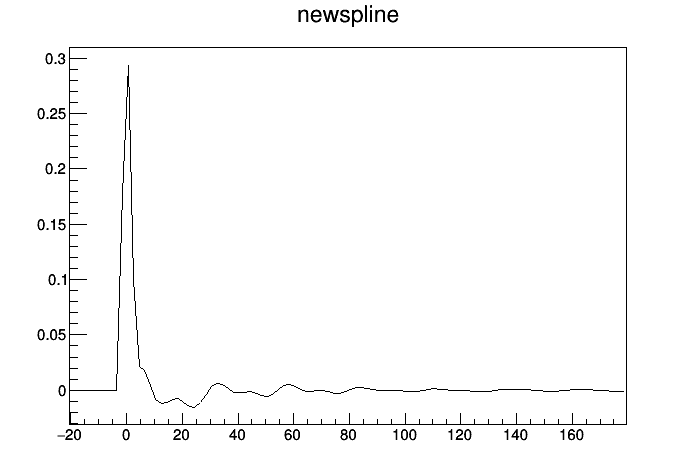

In [3]:
spline0 = f.Get("masterSpline_xtal0")

c = r.TCanvas()
spline0.Draw()
c.Draw()

#### Put the spline into python

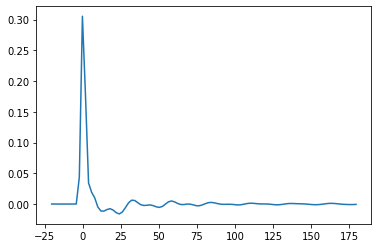

In [4]:
spline = []
times  = []

for i in np.linspace(spline0.GetXmin(), spline0.GetXmax(), spline0.GetNpx()):
    spline.append(spline0.Eval(i))
    times.append(i)

spline = np.array(spline)
times = np.array(times)

plt.plot(times, spline)

#### Now let's make a calo

In [5]:
# just make an array of crystals with number, time array, value array

crystals = []

for num in range(0, 54):
    rootspline = f.Get("masterSpline_xtal" + str(num))

    spline = []
    times  = []

    for i in np.linspace(rootspline.GetXmin(), rootspline.GetXmax(), rootspline.GetNpx()):
        spline.append(rootspline.Eval(i))
        times.append(i)

    spline = np.array(spline)
    times = np.array(times)

    crystals.append([num, times, spline])

In [6]:
# convert crystal number into a plot coordinate
def give_coordinate(n):
    i = (n // 9) - 5
    j = (n % 9) - 8
    
    return(abs(i), abs(j))

In [7]:
give_coordinate(0)

(5, 8)

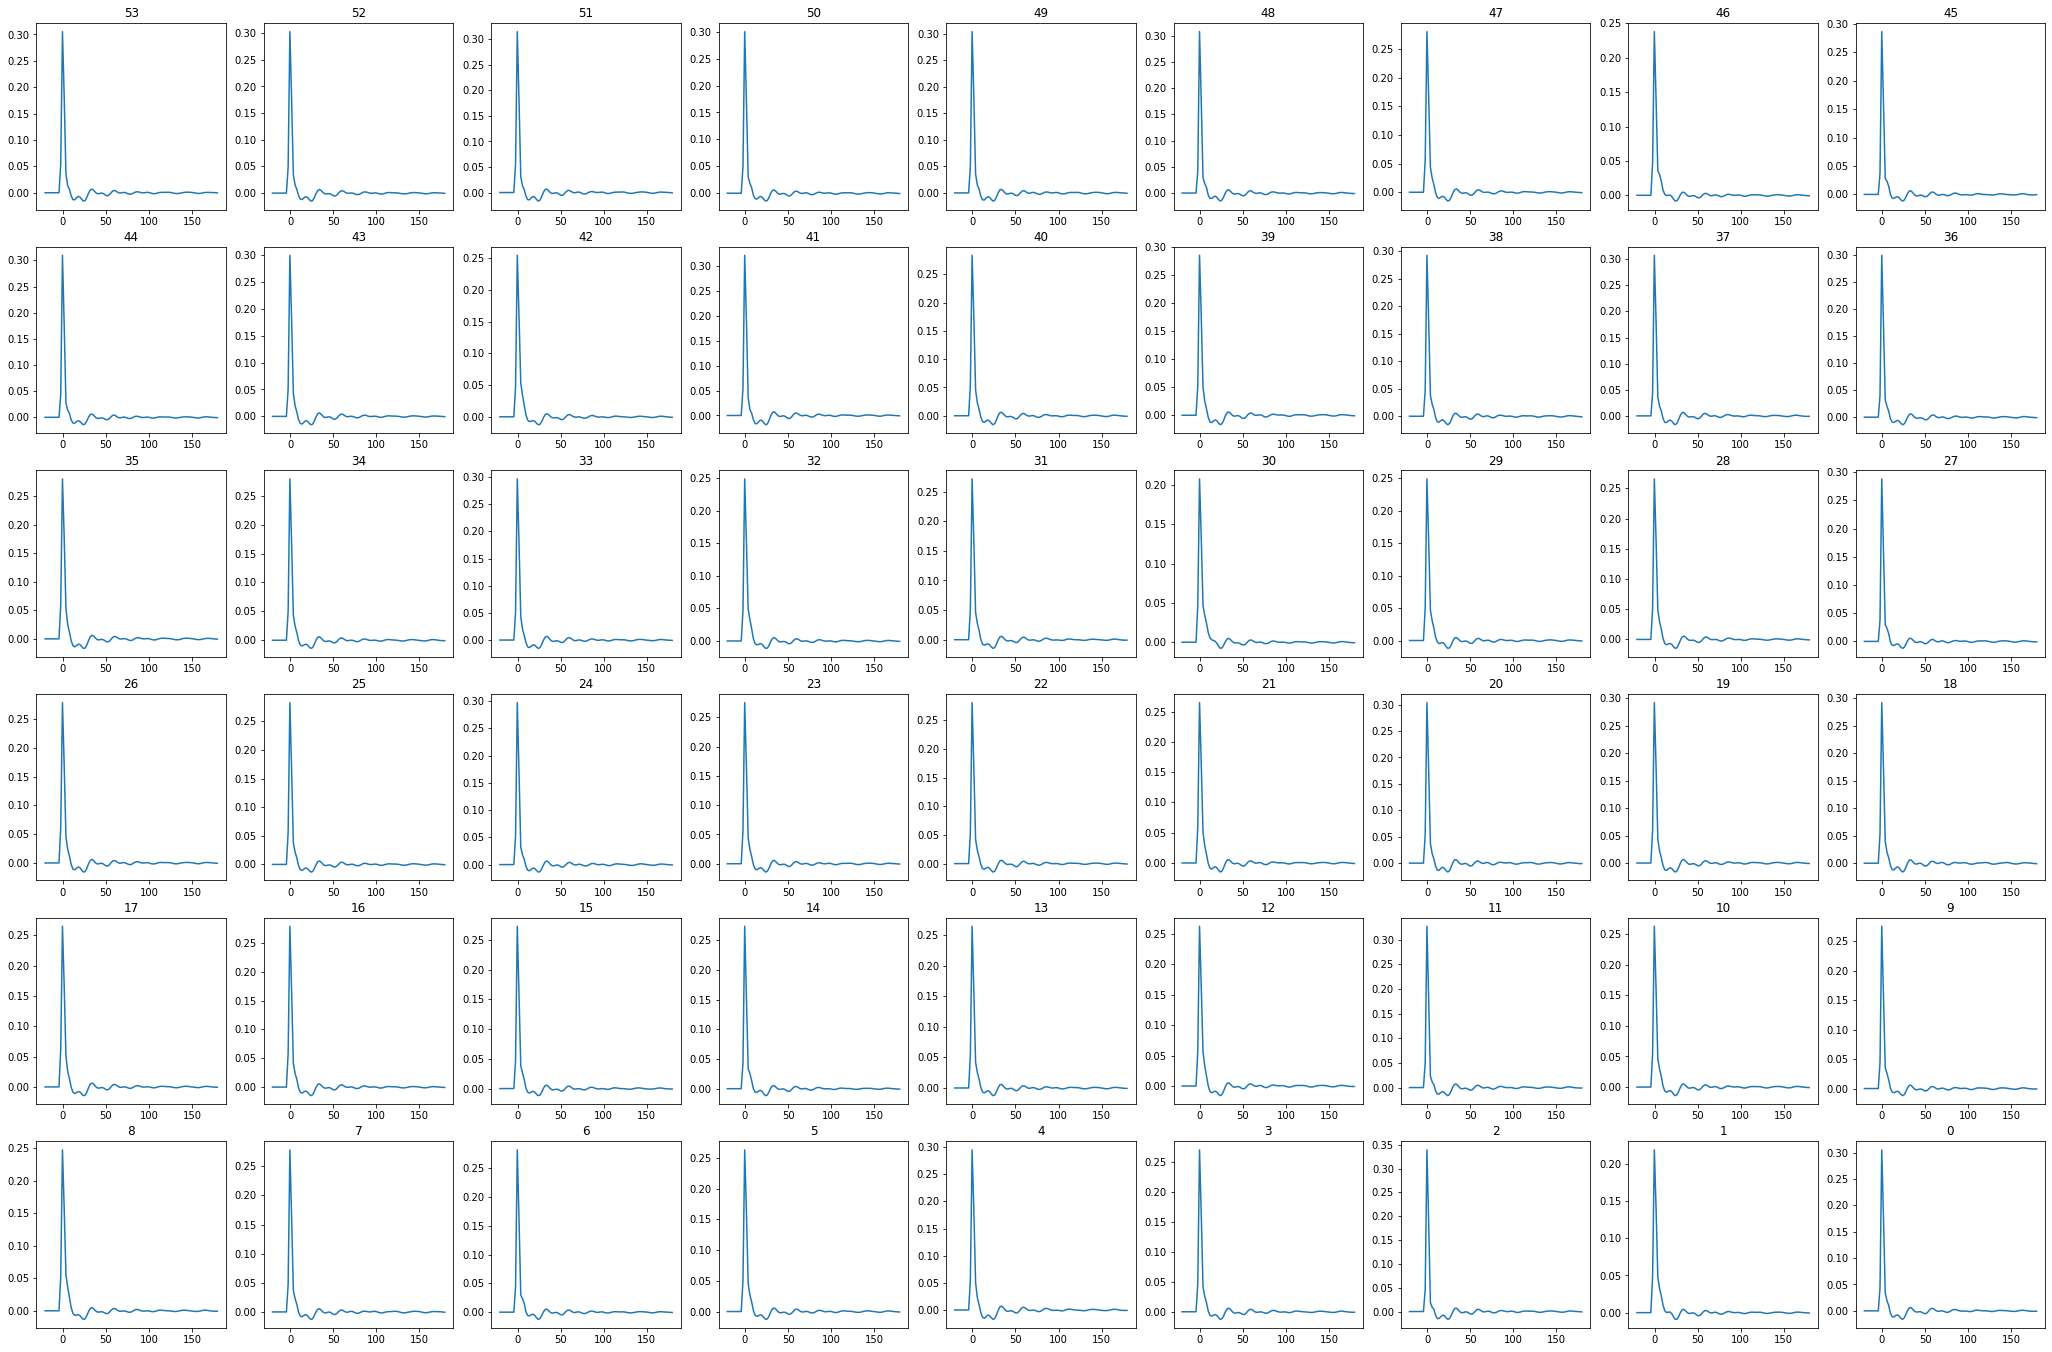

In [8]:
# make the plot
fig, ax = plt.subplots(6, 9)
fig.set_size_inches(36, 24)

for crystal in crystals:
    num    = crystal[0]
    time   = crystal[1]
    spline = crystal[2]
    
    i, j = give_coordinate(num)
    
    ax[i][j].set_title(str(num))
    ax[i][j].plot(time, spline)

#### Those all look the same, so let's do an overlay

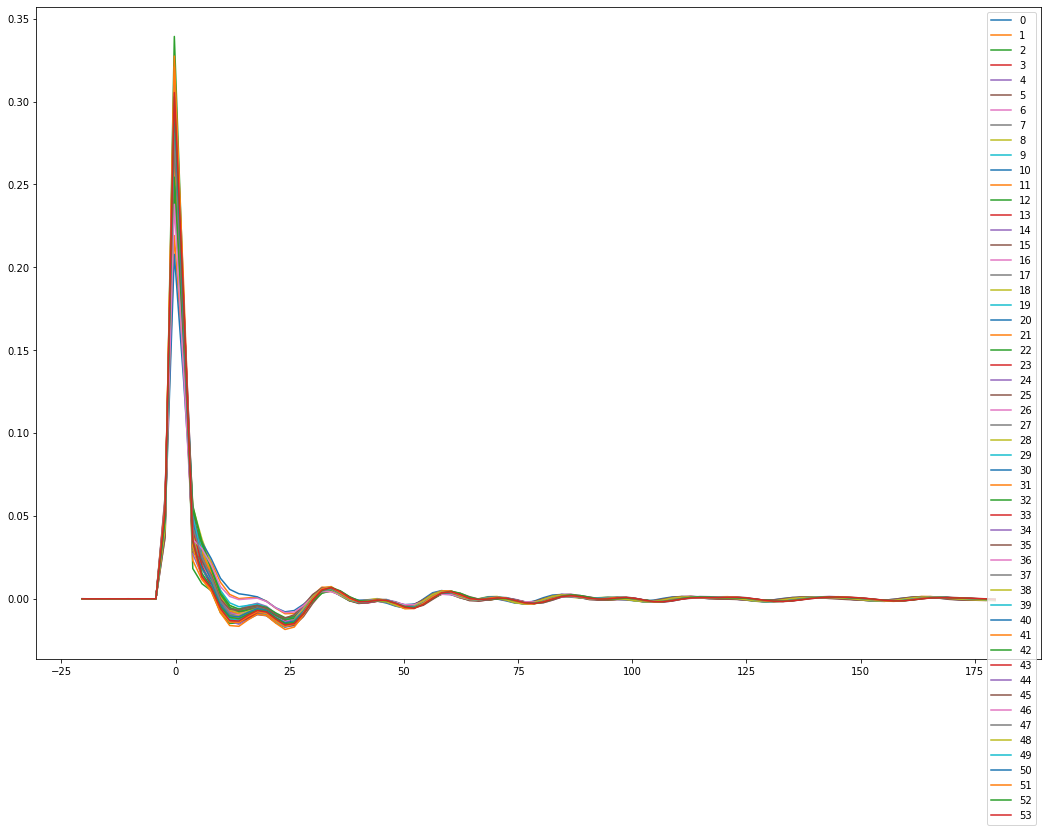

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,12)

for crystal in crystals:
    num    = crystal[0]
    time   = crystal[1]
    spline = crystal[2]
    
    ax.plot(time, spline, label=str(num))
    
plt.legend()